<h2> Use coin stats (easy case) to classify coins</h2>
**1)** Upload CSV with coins label, size (pix), mean saturation at centre region, mean saturation on sides, saturation difference (sides - centre)

In [23]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
       fname = fn

Saving Training_CoinsEasy_stats.csv to Training_CoinsEasy_stats (3).csv


**2)** Read file contents (description on 1st row)
*   <i>Category</i> is a string list with each coin category ('0.01', '0.02', ...)
*   <i>data</i> is a Numpy matrix with size, satC, satSides and SatDiff on each column



In [24]:
import numpy as np
N = 1
data = np.ones((N, 4), dtype=np.int64) #data values (size, satC, satSide, Sat diff)
Category = []
with open(fname, 'r') as fp:
  num_lines = sum(1 for line in fp) #find out number of lines in file
  N = num_lines - 1 #1st line is description
  data.resize((N, 4)) #create storage for it
  fp.seek(0) #rewind file pointer to start again
  #first line contains columns descriptions
  labels = fp.readline().replace('\n','') #string
  labels = labels.split(',') #string split as list elements
  row=0
  for lines in fp.readlines():
    txt = lines.replace('\n','')
    txt = txt.split(',')
    Category.append(txt[0]) #Coin category
    for col in range(4):
      data[row][col] = txt[col+1]
    row = row + 1
  print('Read ' + str(row) + ' entries')
print(Category[0] + str(data[0]))
print(Category[1] + str(data[1])+'\n......')

Read 115 entries
0.01[103 116 119   3]
0.01[104 131 147  16]
......


**3)** Plot classes on 3D feature space (size, saturation centre, saturation sides)

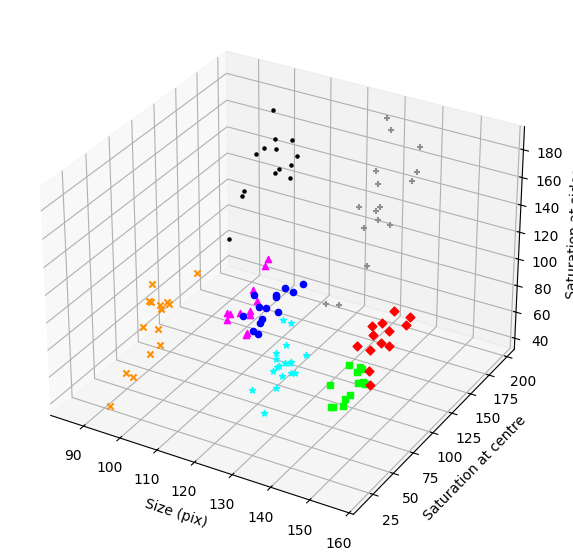

In [25]:
import matplotlib.pyplot as plt
#creates class marker and colour from category ('0.01', '0.02', etc)
def create_marker(ct):
  if ct == '0.01':
    return ('.', '#000000')
  elif ct == '0.02':
    return ('+', '#8F8F8F')
  elif ct == '0.05':
    return ('x', '#FF8F00')
  elif ct == '0.1':
    return ('*', '#00FFFF')
  elif ct == '0.2':
    return ('^', '#FF00FF')
  elif ct == '0.5':
    return ('s', '#00FF00')
  elif ct == '1':
    return ('o', '#0000FF')
  else: #£2
    return ('D', '#FF0000')

fig = plt.figure(figsize=[9.0, 7.0])
ax = fig.add_subplot(projection='3d') #creates mplot3d 3D Axes
ax.set_xlabel('Size (pix)')
ax.set_ylabel('Saturation at centre')
ax.set_zlabel('Saturation at sides')
for row in range(N):
  m, clr = create_marker(Category[row])
  ax.scatter(data[row][0], data[row][1], data[row][2], c = clr, marker = m )
plt.show()

**4)** Train <b>Naive Bayes classifier</b> (assuming Gaussian PDFs)<br>
Using [Scikit-learn](https://scikit-learn.org/stable/index.html) [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) implementation

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
#remove data col 3 (sat diff), leave only Size, SatC, SatSides
X = np.delete(data, 3, axis=1)
model.fit(X, Category); #data matrix, category for each row
print('Training complete!')

Training complete!


**5)** How well the <i>training set</i> itself is classified?

In [27]:
ynew = model.predict(X)
yprob = model.predict_proba(X)
count = 0
for i in range(N):
  if(ynew[i] == Category[i]):
    count = count + 1; #hit
  else: #show mistakes
    print(Category[i] + str(X[i]) +'-->'+ynew[i]+ str(yprob[i].round(2)))
print(str(count)+' correct out of ' + str(N))

115 correct out of 115


**6)** Open test data file and retrieve data and true labels

In [28]:
uploaded = files.upload()
for fn in uploaded.keys():
       fname = fn
newdata = np.ones((1, 4), dtype=np.int64) #data values (size, satC, satSide, Sat diff)
newCategory = []
with open(fname, 'r') as fp:
  num_lines = sum(1 for line in fp) #find out number of lines in file
  N = num_lines - 1 #1st line is description
  newdata.resize((N, 4)) #create storage for it
  fp.seek(0) #rewind file pointer to start again
  #first line contains columns descriptions
  labels = fp.readline().replace('\n','') #string
  labels = labels.split(',') #string split as list elements
  row=0
  for lines in fp.readlines():
    txt = lines.replace('\n','')
    txt = txt.split(',')
    newCategory.append(txt[0]) #Coin category
    for col in range(4):
      newdata[row][col] = txt[col+1]
    row = row + 1
  print('Read ' + str(row) + ' entries')
  print(newCategory[0] + str(newdata[0]))
  print(newCategory[1] + str(newdata[1])+'\n......')

Saving TEST_result_coins_easy1_5.csv to TEST_result_coins_easy1_5 (3).csv
Read 59 entries
0.01[102 110 101  -9]
0.01[103 153 155   2]
......


Plot the classes onto a 3D space for visual help like was done earlier in with the training data

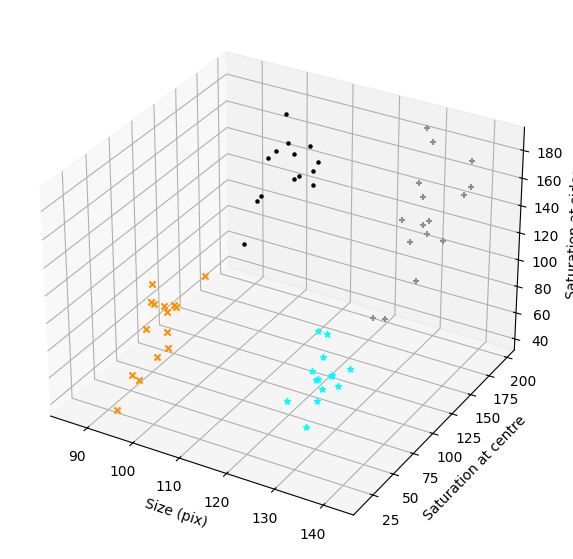

In [29]:
import matplotlib.pyplot as plt
#creates class marker and colour from category ('0.01', '0.02', etc)
def create_marker(ct):
  if ct == '0.01':
    return ('.', '#000000')
  elif ct == '0.02':
    return ('+', '#8F8F8F')
  elif ct == '0.05':
    return ('x', '#FF8F00')
  elif ct == '0.1':
    return ('*', '#00FFFF')
  elif ct == '0.2':
    return ('^', '#FF00FF')
  elif ct == '0.5':
    return ('s', '#00FF00')
  elif ct == '1':
    return ('o', '#0000FF')
  else: #£2
    return ('D', '#FF0000')

fig = plt.figure(figsize=[9.0, 7.0])
ax = fig.add_subplot(projection='3d') #creates mplot3d 3D Axes
ax.set_xlabel('Size (pix)')
ax.set_ylabel('Saturation at centre')
ax.set_zlabel('Saturation at sides')
for row in range(N):
  m, clr = create_marker(Category[row])
  ax.scatter(data[row][0], data[row][1], data[row][2], c = clr, marker = m )
plt.show()

**7)** Classify the new data!

In [30]:
#remove data col 3 (sat diff), leave only Size, SatC, SatSides
Xnew = np.delete(newdata, 3, axis=1)
# COMPLETE THIS (pretty much like step 5)
ynew = model.predict(Xnew)
yprob = model.predict_proba(Xnew)
count = 0
for i in range(N):
  if(ynew[i] == newCategory[i]):
    count = count + 1; #hit
  else: #show mistakes
    print(newCategory[i] + str(X[i]) +'-->'+ynew[i]+ str(yprob[i].round(2)))
print(str(count)+' correct out of ' + str(N))

0.01[103 116 119]-->0.05[0.16 0.   0.7  0.   0.15 0.   0.   0.  ]
0.02[106 180 162]-->0.1[0.   0.22 0.   0.78 0.   0.   0.   0.  ]
57 correct out of 59
